In [32]:
from functions import select
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
from tqdm.notebook import tqdm, trange
import math

In [3]:
n = 10000

In [35]:
def fun_median(arr, k):
    comparisons = 0
    swaps = 0
    step = math.ceil(len(arr)/k)
    arrays = [arr[i:i+step] for i in range(0, k*step, step)]
    medians = []
    for a in arrays:
        res, c, s = select(a, len(a)//2)
        medians.append(res)
        comparisons += c
        swaps += s
    res, c, s = select(medians, len(medians)//2)
    comparisons += c
    swaps += s
    return res, comparisons, swaps

In [36]:
fun_median([i for i in range(n)], 3)

(5001, 12512506, 12502506)

In [64]:
data = {}
for i in trange(100, n+1, 100):
    results = {3:[0,0,0], 5:[0,0,0], 7:[0,0,0], 9:[0,0,0]}
    for k in [3, 5, 7, 9]:
        _, c, s = fun_median([x for x in range(i)], k)
        results[k][0] += c
        results[k][1] += s
        results[k][2] += timeit.timeit(f'fun_median([x for x in range(i)], k)', number=1, globals=globals())
    data[i] = results

  0%|          | 0/100 [00:00<?, ?it/s]

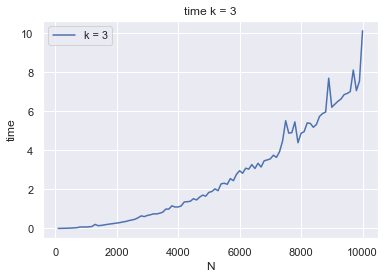

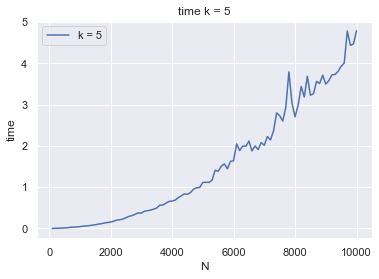

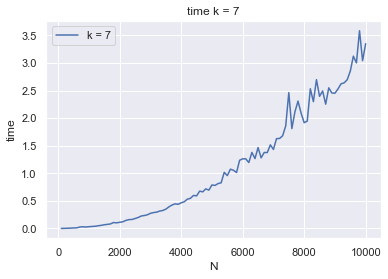

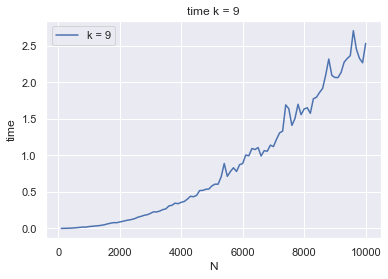

<Figure size 432x288 with 0 Axes>

In [71]:
%matplotlib inline
sns.set()
xs = []
y1 = []
y2 = []
y3 = []
y4 = []
for key, value in data.items():
    xs.append(key)
    for k, v in value.items():
        if k == 3:
            y1.append(v[2])
        elif k == 5:
            y2.append(v[2])
        elif k == 7:
            y3.append(v[2])
        elif k == 9:
            y4.append(v[2])
plt.xlabel('N')
plt.ylabel('time')
plt.title(f'time k = 3')
plt.plot(xs, y1, label=f'k = 3')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('time')
plt.title(f'time k = 5')
plt.plot(xs, y2, label=f'k = 5')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('time')
plt.title(f'time k = 7')
plt.plot(xs, y3, label=f'k = 7')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('time')
plt.title(f'time k = 9')
plt.plot(xs, y4, label=f'k = 9')
plt.legend()
plt.show()
plt.clf()


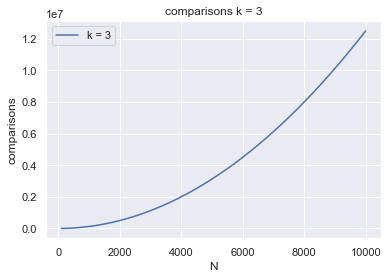

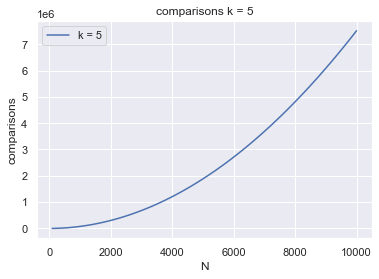

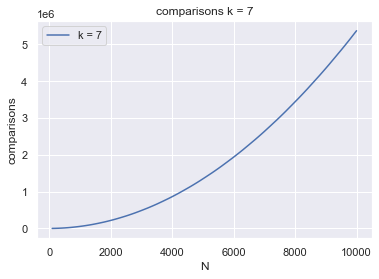

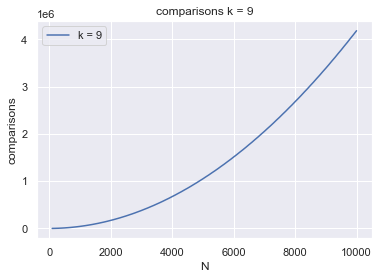

<Figure size 432x288 with 0 Axes>

In [69]:
sns.set()
xs = []
y1 = []
y2 = []
y3 = []
y4 = []
for key, value in data.items():
    xs.append(key)
    for k, v in value.items():
        if k == 3:
            y1.append(v[0])
        elif k == 5:
            y2.append(v[0])
        elif k == 7:
            y3.append(v[0])
        elif k == 9:
            y4.append(v[0])
plt.xlabel('N')
plt.ylabel('comparisons')
plt.title(f'comparisons k = 3')
plt.plot(xs, y1, label=f'k = 3')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('comparisons')
plt.title(f'comparisons k = 5')
plt.plot(xs, y2, label=f'k = 5')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('comparisons')
plt.title(f'comparisons k = 7')
plt.plot(xs, y3, label=f'k = 7')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('comparisons')
plt.title(f'comparisons k = 9')
plt.plot(xs, y4, label=f'k = 9')
plt.legend()
plt.show()
plt.clf()

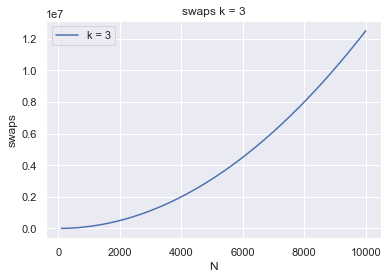

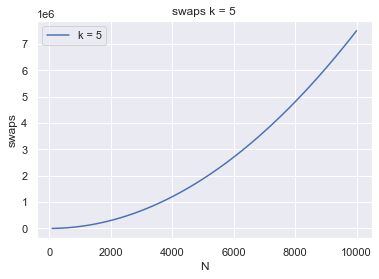

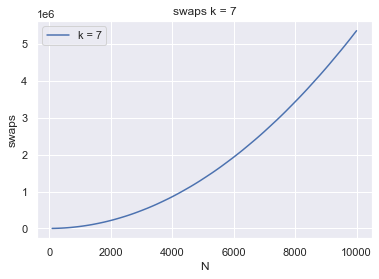

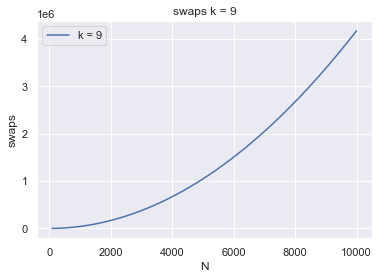

<Figure size 432x288 with 0 Axes>

In [70]:
sns.set()
xs = []
y1 = []
y2 = []
y3 = []
y4 = []
for key, value in data.items():
    xs.append(key)
    for k, v in value.items():
        if k == 3:
            y1.append(v[1])
        elif k == 5:
            y2.append(v[1])
        elif k == 7:
            y3.append(v[1])
        elif k == 9:
            y4.append(v[1])
plt.xlabel('N')
plt.ylabel('swaps')
plt.title(f'swaps k = 3')
plt.plot(xs, y1, label=f'k = 3')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('swaps')
plt.title(f'swaps k = 5')
plt.plot(xs, y2, label=f'k = 5')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('swaps')
plt.title(f'swaps k = 7')
plt.plot(xs, y3, label=f'k = 7')
plt.legend()
plt.show()
plt.clf()

plt.xlabel('N')
plt.ylabel('swaps')
plt.title(f'swaps k = 9')
plt.plot(xs, y4, label=f'k = 9')
plt.legend()
plt.show()
plt.clf()

In [68]:
data

{100: {3: [1381, 1281, 0.0009380999999848427],
  5: [887, 787, 0.0006475999998656334],
  7: [720, 614, 0.0005413000003500201],
  9: [598, 498, 0.00045030000001133885]},
 200: {3: [5291, 5089, 0.0033091000000240456],
  5: [3262, 3062, 0.0022792999998273444],
  7: [2468, 2262, 0.0015983999996933562],
  9: [2023, 1815, 0.0016403000004174828]},
 300: {3: [11630, 11330, 0.007846299999982875],
  5: [7137, 6837, 0.004767999999785388],
  7: [5290, 4984, 0.003805600000305276],
  9: [4172, 3872, 0.0024434000001747336]},
 400: {3: [20506, 20106, 0.011409699999603617],
  5: [12512, 12112, 0.008032500000354048],
  7: [9105, 8705, 0.005224300000008952],
  9: [7309, 6901, 0.004129799999645911]},
 500: {3: [31966, 31464, 0.017865700000129436],
  5: [19387, 18887, 0.011122000000341359],
  7: [14045, 13545, 0.009150800000043091],
  9: [11082, 10582, 0.00708840000015698]},
 600: {3: [45755, 45155, 0.028280200000153854],
  5: [27762, 27162, 0.01759859999992841],
  7: [20059, 19459, 0.010952800000268326],


In [77]:
xs = []
y1 = []
y2 = []
y3 = []
y4 = []
for key, value in data.items():
    xs.append(key)
    for k, v in value.items():
        if k == 3:
            y1.append(v)
        elif k == 5:
            y2.append(v)
        elif k == 7:
            y3.append(v)
        elif k == 9:
            y4.append(v)

for i, k in [(3, y1), (5, y2), (7, y3), (9,y4)]:
    with open(f'z3data\\data{i}.csv', 'w') as f:
        f.write('N,time,comparisons,swaps\n')
        for j in range(len(xs)):
            f.write(f'{xs[j]},{k[j][2]},{k[j][0]},{k[j][1]}\n')